In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [116]:
df = pd.read_csv('pokedex.csv')
df.drop(['name', 'percentage_male', 'type'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pokedex_number  801 non-null    int64  
 1   attack          801 non-null    int64  
 2   defense         801 non-null    int64  
 3   height_m        781 non-null    float64
 4   hp              801 non-null    int64  
 5   sp_attack       801 non-null    int64  
 6   sp_defense      801 non-null    int64  
 7   speed           801 non-null    int64  
 8   weight_kg       781 non-null    float64
 9   generation      801 non-null    int64  
 10  is_legendary    801 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 69.0 KB


In [117]:
df.fillna({'height_m':df['height_m'].mean(), 'weight_kg':df['weight_kg'].mean()}, inplace=True)
df.isnull().sum()

pokedex_number    0
attack            0
defense           0
height_m          0
hp                0
sp_attack         0
sp_defense        0
speed             0
weight_kg         0
generation        0
is_legendary      0
dtype: int64

In [118]:
def assign(X, clusters):
    for cluster in clusters: # resetting the points in the cluster
        cluster['points'] = []

    for point in X:
        distances = [np.linalg.norm(point - c['centroid']) for c in clusters] # distance of point from each centre
        mincluster_pos = np.argmin(distances) 
        clusters[mincluster_pos]['points'].append(point)

In [119]:
def update(clusters):
    for cluster in clusters:
        if cluster['points']: # if there are points present in the cluster
            cluster['centroid'] = np.mean(cluster['points'], axis=0) 

In [120]:
def converged(old_centroids, clusters):
    new_centroids = [c['centroid'] for c in clusters]
    change = np.linalg.norm(np.array(new_centroids) - np.array(old_centroids))
    return change < 1e-6

In [121]:
df = (df-df.mean())/df.std()
X    = df.values

labels = np.zeros(len(X), dtype=int)
inertia = 0
sil_score = 0

for k in range(2,11):
    clusters = []
    np.random.seed(42)

    for i in range(k):
        center = 2*(2*np.random.random((df.shape[1],)) - 1)
        cluster = {
            'centroid' : center,
            'points' : []
        }

        clusters.append(cluster)

    max_iters = 1000000
    for itr in range(max_iters):
        old_centroids = [c['centroid'].copy() for c in clusters]

        assign(X, clusters)
        update(clusters)

        if converged(old_centroids, clusters):
            break

    templabels = np.zeros(len(X), dtype=int)
    for i, point in enumerate(X):
        distances = [np.linalg.norm(point - c['centroid']) for c in clusters]
        templabels[i] = np.argmin(distances)

    tempinertia = np.sum([np.min([np.linalg.norm(x - c['centroid'])**2 for c in clusters]) for x in X])
    tempsil_score = silhouette_score(X, templabels)

    if tempsil_score > sil_score:
        sil_score = tempsil_score
        inertia = tempinertia
        labels = templabels

print("K-Means Metrics:")
print(f"Inertia (Sum of Squared Distances): {inertia:.2f}")
print(f"Silhouette Score: {sil_score:.3f}")

K-Means Metrics:
Inertia (Sum of Squared Distances): 6907.79
Silhouette Score: 0.217


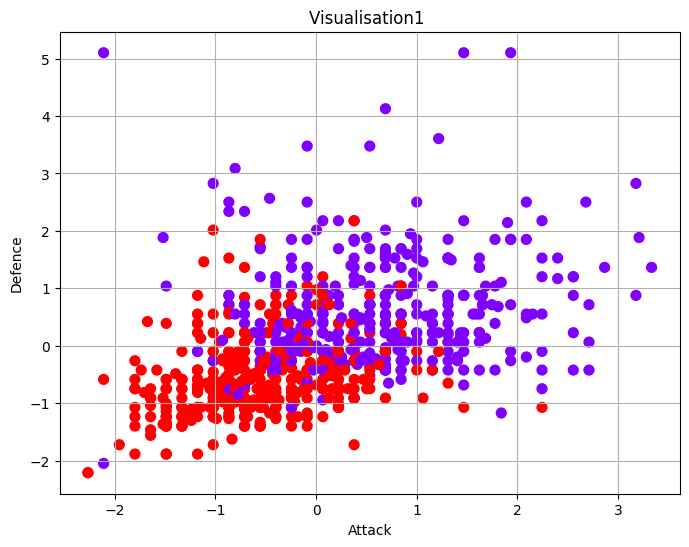

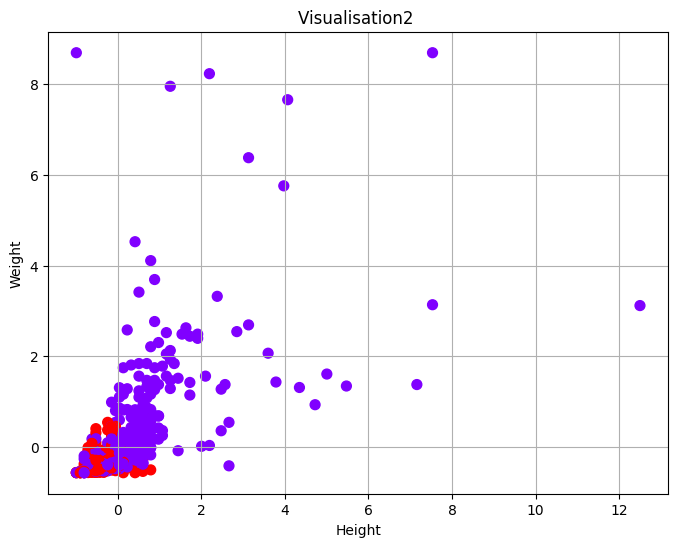

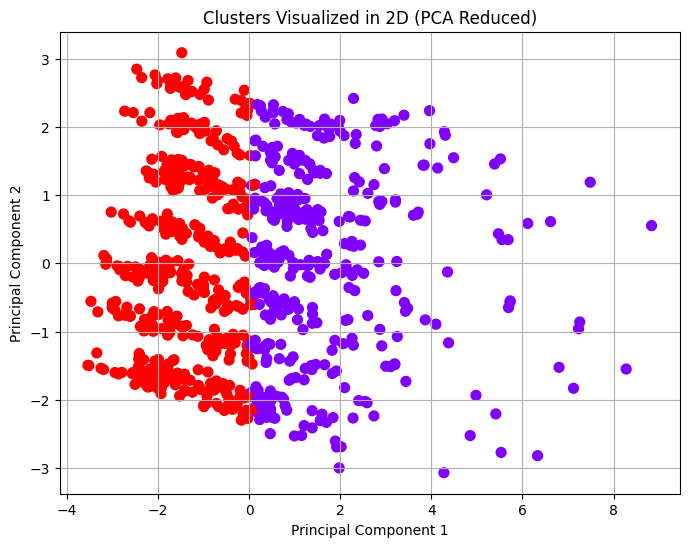

In [122]:
plt.figure(figsize=(8,6))
plt.scatter(X[:, 1], X[:, 2], c=labels, cmap='rainbow', s=50)
plt.title("Visualisation1 ")
plt.xlabel("Attack")
plt.ylabel("Defence")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(X[:, 3], X[:, 8], c=labels, cmap='rainbow', s=50)
plt.title("Visualisation2 ")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.grid(True)
plt.show()

pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)
plt.figure(figsize=(8,6))
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=labels, cmap='rainbow', s=50)
plt.title("Clusters Visualized in 2D (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()
